## Import needed Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

In [4]:
bikeSharing_dataset = pd.read_csv('BikeSharing.csv', parse_dates=['datetime'])
bikeSharing_dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Exploration dataset

In [6]:
bikeSharing_dataset.head() # first 5 row

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bikeSharing_dataset.shape #size of dataset

(10886, 12)

In [8]:
bikeSharing_dataset.describe() #from count we note no missing and distribution of data is normal no outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [9]:
bikeSharing_dataset.info() # information about dataset , columns , dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
# numeric columns
numeric_columns = bikeSharing_dataset.select_dtypes(include=['number']).columns

# calc correlation
correlation_matrix = bikeSharing_dataset[numeric_columns].corr()
correlation_matrix

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [11]:
correlation_sorted = correlation_matrix['count'].sort_values(ascending=False)
correlation_sorted

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

##### we notice Strong positive correlation Count with rigistered

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'season'),
  Text(0, 1.5, 'holiday'),
  Text(0, 2.5, 'workingday'),
  Text(0, 3.5, 'weather'),
  Text(0, 4.5, 'temp'),
  Text(0, 5.5, 'atemp'),
  Text(0, 6.5, 'humidity'),
  Text(0, 7.5, 'windspeed'),
  Text(0, 8.5, 'casual'),
  Text(0, 9.5, 'registered'),
  Text(0, 10.5, 'count')])

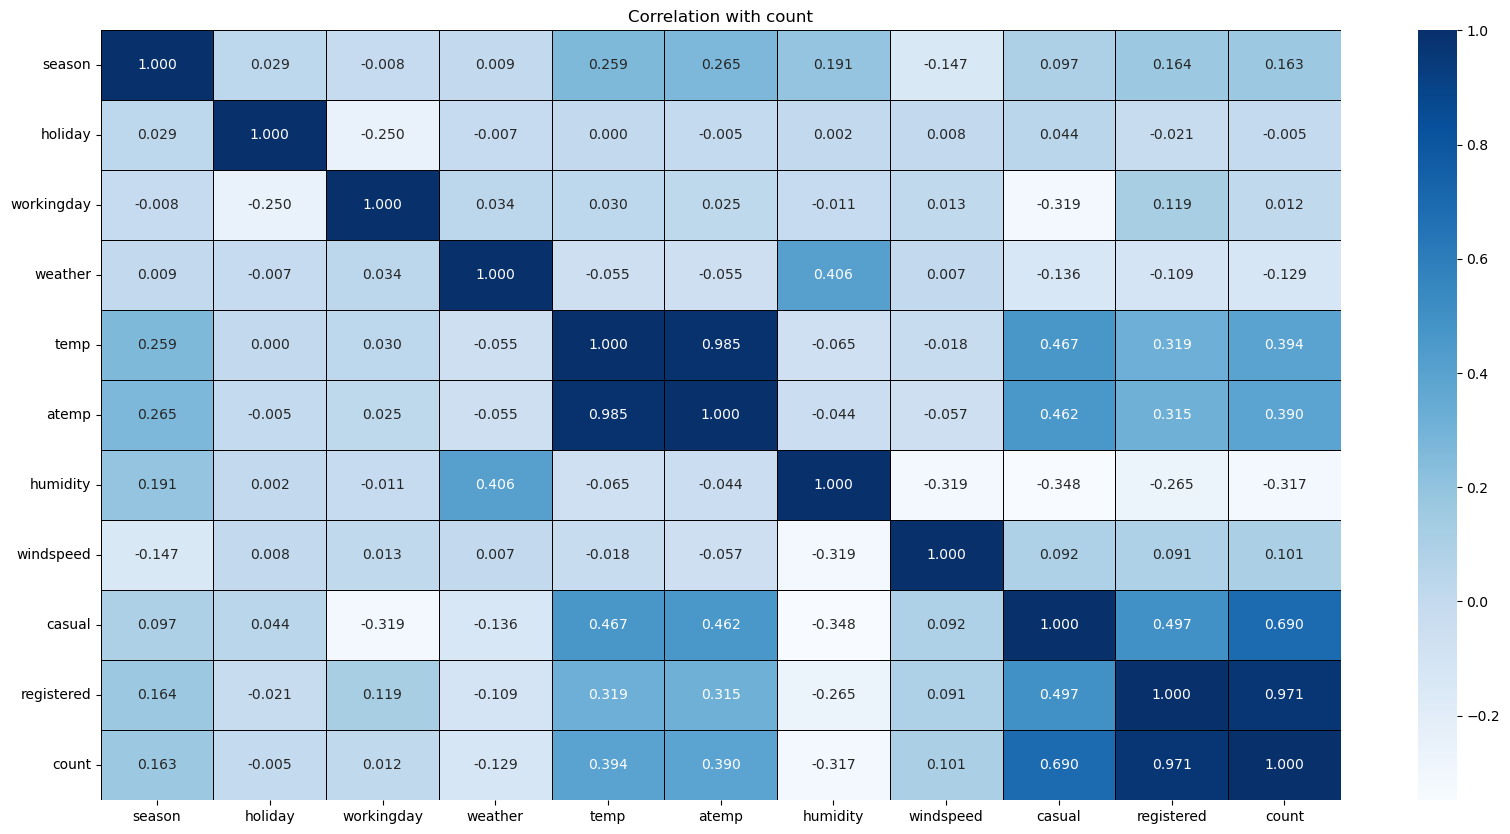

In [13]:
# heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='black', fmt='.3f')
plt.title('Correlation with count')
plt.yticks(rotation=0)

## 1. Preprocessing the Data

#### 1.1 Check for missing values.

In [16]:
bikeSharing_dataset.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 1.2 Check for duplicates.

In [18]:
bikeSharing_dataset.duplicated().sum()

0

#### additional but important Check for Outlier

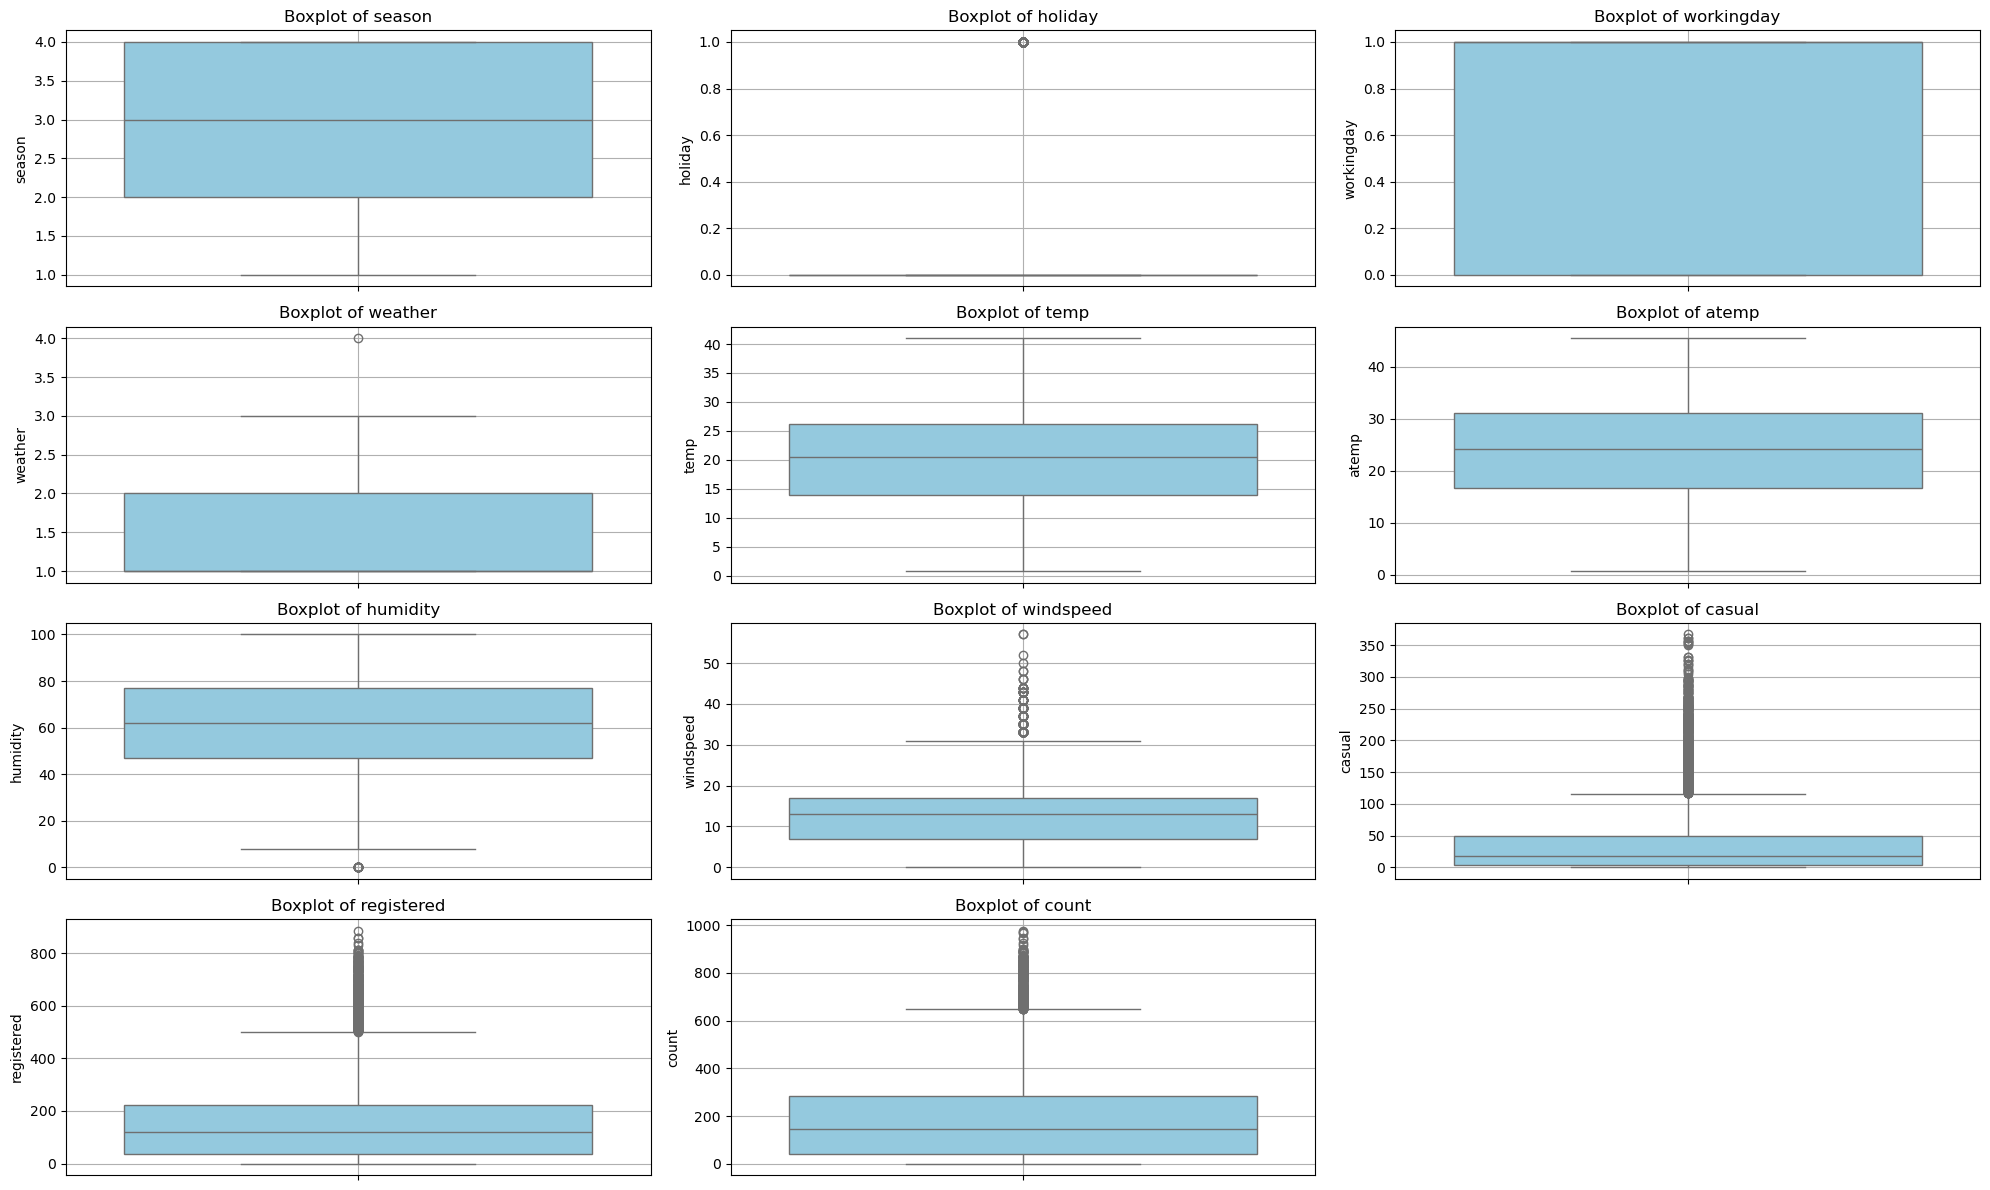

In [20]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(bikeSharing_dataset.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 3, i + 1) # 4 rows , 3cols
    sns.boxplot(y=bikeSharing_dataset[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
    plt.tight_layout()

In [21]:
def remove_outliers(dataset, columns):
    outlier_info = {}
    initial_rows = dataset.shape[0]
    for col in columns:
        if dataset[col].dtype != 'object':
            q1_value = dataset[col].quantile(0.25)
            q3_value = dataset[col].quantile(0.75)
            IQR = q3_value - q1_value
            max_value = q3_value + (1.5 * IQR)
            min_value = q1_value - (1.5 * IQR)
            outliers = dataset[(dataset[col] < min_value) | (dataset[col] > max_value)]
            num_outliers = len(outliers)
            outlier_percentage = (num_outliers / initial_rows) * 100
            outlier_info[col] = {'num_outliers': num_outliers, 'outlier_percentage': outlier_percentage}
            dataset = dataset[(dataset[col] >= min_value) & (dataset[col] <= max_value)]
    return dataset, outlier_info

In [22]:
print(f'dataset shape befor remove outlier: {bikeSharing_dataset.shape}')
bikeSharing_dataset, outlier_info = remove_outliers(bikeSharing_dataset, ['windspeed', 'humidity', 'casual', 'registered'])
for col, info in outlier_info.items():
    print(f'Column {col}: Removed {info["num_outliers"]} rows ({info["outlier_percentage"]:.2f}%)')
print(f'dataset shape after removing outliers: {bikeSharing_dataset.shape}')

dataset shape befor remove outlier: (10886, 12)
Column windspeed: Removed 227 rows (2.09%)
Column humidity: Removed 21 rows (0.19%)
Column casual: Removed 737 rows (6.77%)
Column registered: Removed 518 rows (4.76%)
dataset shape after removing outliers: (9383, 12)


#### 1.3 Encode Categorical Variables:
○ Convert categorical variables into a numerical format using encoding
techniques (e.g., one-hot encoding).

In [24]:
bikeSharing_dataset = pd.get_dummies(bikeSharing_dataset, columns=['season', 'weather'], drop_first=True)
bikeSharing_dataset

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,3,13,16,False,False,False,False,False,False
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,8,32,40,False,False,False,False,False,False
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,5,27,32,False,False,False,False,False,False
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,3,10,13,False,False,False,False,False,False
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,0,1,1,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,7,329,336,False,False,True,False,False,False
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,10,231,241,False,False,True,False,False,False
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,4,164,168,False,False,True,False,False,False
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,12,117,129,False,False,True,False,False,False


## 2. Exploratory Data Analysis (EDA)

#### 2.1. Analyze the Target Variable

In [27]:
bikeSharing_dataset['count'].describe()

count    9383.000000
mean      144.717787
std       124.423204
min         1.000000
25%        33.000000
50%       119.000000
75%       226.000000
max       563.000000
Name: count, dtype: float64

Text(0, 0.5, 'Frequency')

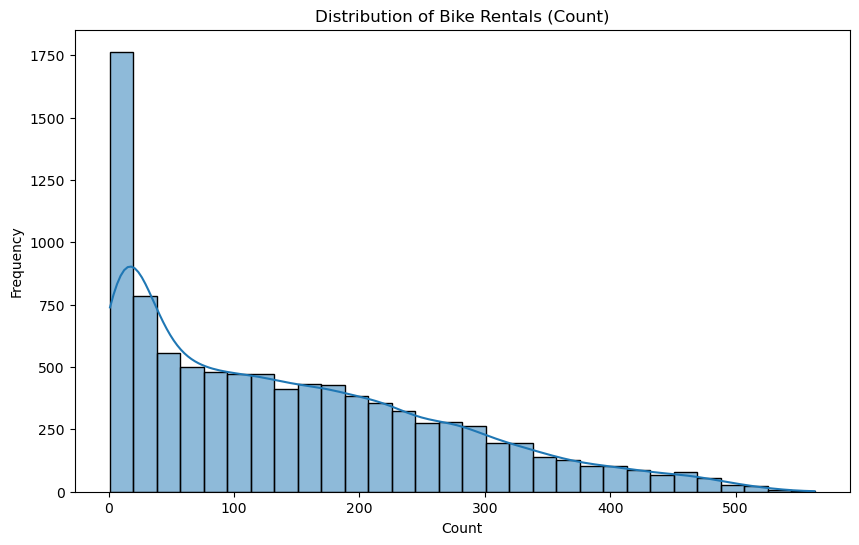

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(bikeSharing_dataset['count'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals (Count)')
plt.xlabel('Count')
plt.ylabel('Frequency')

#### 2.2. Analyze Relationships:

○ Use scatter plots or bar charts to analyze relationships between features
and the target variable.

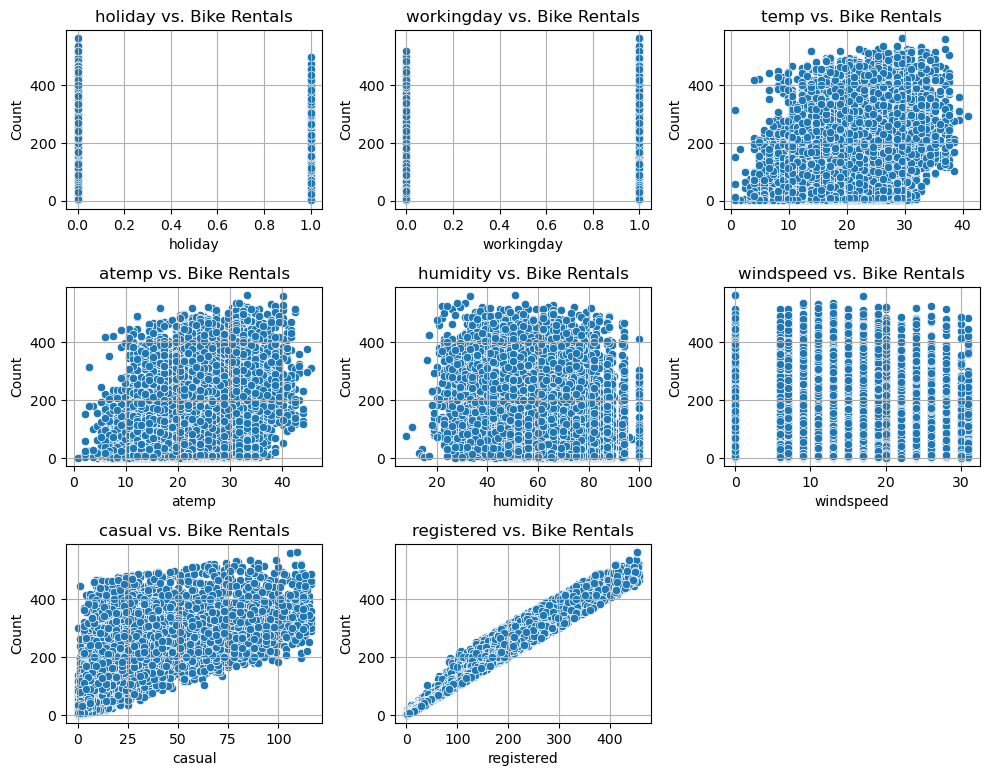

In [30]:
numeric_columns = bikeSharing_dataset.select_dtypes(include=['float64', 'int64']).columns.drop('count')

plt.figure(figsize=(10, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1) 
    sns.scatterplot(x=column, y='count', data=bikeSharing_dataset)
    plt.title(f'{column} vs. Bike Rentals')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()

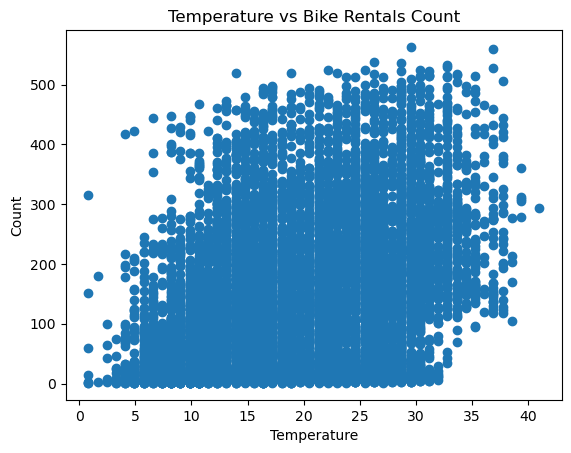

In [31]:
plt.scatter(bikeSharing_dataset['temp'], bikeSharing_dataset['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Bike Rentals Count')
plt.show()

#### 2.3.Correlation Analysis

Create a correlation heatmap to identify features strongly correlated with
the target variable.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'count'),
  Text(0, 1.5, 'registered'),
  Text(0, 2.5, 'casual'),
  Text(0, 3.5, 'temp'),
  Text(0, 4.5, 'atemp'),
  Text(0, 5.5, 'season'),
  Text(0, 6.5, 'windspeed'),
  Text(0, 7.5, 'workingday'),
  Text(0, 8.5, 'holiday'),
  Text(0, 9.5, 'weather'),
  Text(0, 10.5, 'humidity')])

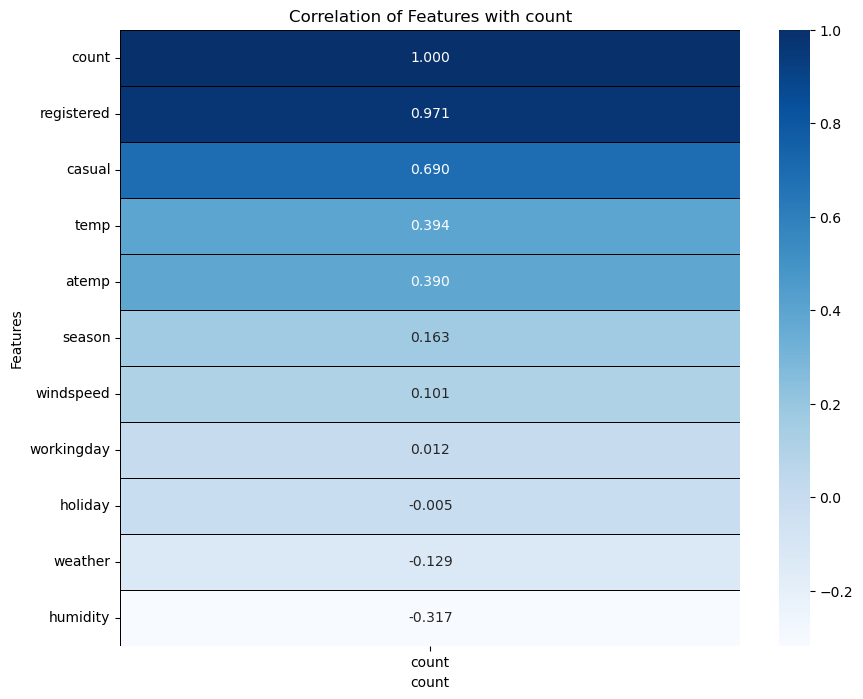

In [33]:
corr_with_count = correlation_matrix[['count']].sort_values(by='count', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_count, annot=True, cmap='Blues', linewidths=0.5, linecolor='black', fmt='.3f')
plt.title('Correlation of Features with count')
plt.xlabel('count')
plt.ylabel('Features')
plt.yticks(rotation=0)

## 3. Feature Engineering:


#### 3.1. Create New Features:
○ Generate at least one new feature from the existing data


In [36]:
bikeSharing_dataset['hour'] = bikeSharing_dataset['datetime'].dt.hour
bikeSharing_dataset['day'] = bikeSharing_dataset['datetime'].dt.day
bikeSharing_dataset['month'] = bikeSharing_dataset['datetime'].dt.month
bikeSharing_dataset['year'] = bikeSharing_dataset['datetime'].dt.year
bikeSharing_dataset['day_of_week'] = bikeSharing_dataset['datetime'].dt.dayofweek
bikeSharing_dataset['is_weekend'] = bikeSharing_dataset['day_of_week'].isin([5, 6]).astype(int) #weekend days

bikeSharing_dataset.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_4,weather_2,weather_3,weather_4,hour,day,month,year,day_of_week,is_weekend
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,False,False,False,False,0,1,1,2011,5,1
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,False,False,False,False,1,1,1,2011,5,1
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,False,False,False,False,2,1,1,2011,5,1
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,False,False,False,False,3,1,1,2011,5,1
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,False,False,False,False,4,1,1,2011,5,1


In [37]:
bikeSharing_dataset['temp_humidity'] = bikeSharing_dataset['temp'] * bikeSharing_dataset['humidity']
bikeSharing_dataset['atemp_windspeed'] = bikeSharing_dataset['atemp'] * bikeSharing_dataset['windspeed']

In [38]:
numeric_columns = bikeSharing_dataset.select_dtypes(include=['number']).columns
bikeSharing_dataset[numeric_columns].corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,day_of_week,is_weekend,temp_humidity,atemp_windspeed
holiday,1.000000,-0.259145,-0.031669,-0.036985,0.003345,0.024565,0.007810,-0.027322,-0.021773,-0.007603,0.006648,-0.012695,0.020649,-0.179728,-0.099208,-0.006077,-0.009770
workingday,-0.259145,1.000000,0.112607,0.107301,-0.077381,0.029272,-0.107965,0.173798,0.125958,0.032816,0.018496,0.004263,-0.009807,-0.692005,-0.935365,0.028782,0.090003
temp,-0.031669,0.112607,1.000000,0.986293,-0.004272,-0.019793,0.509823,0.269421,0.340925,0.103768,0.024682,0.264096,0.043404,-0.089990,-0.104418,0.755272,0.494742
atemp,-0.036985,0.107301,0.986293,1.000000,0.013430,-0.061606,0.503059,0.266777,0.337200,0.100589,0.021702,0.269117,0.040791,-0.091871,-0.097004,0.753366,0.484134
humidity,0.003345,-0.077381,-0.004272,0.013430,1.000000,-0.300920,-0.329946,-0.267676,-0.300735,-0.250274,-0.008805,0.208128,-0.067640,0.022909,0.078498,0.610102,-0.216083
windspeed,0.024565,0.029272,-0.019793,-0.061606,-0.300920,1.000000,0.108955,0.108041,0.116174,0.132210,0.036928,-0.129008,-0.025183,-0.038300,-0.039153,-0.178466,0.788992
casual,0.007810,-0.107965,0.509823,0.503059,-0.329946,0.108955,1.000000,0.587499,0.719389,0.378115,0.015402,0.121028,0.107281,0.107004,0.108372,0.148014,0.369182
registered,-0.027322,0.173798,0.269421,0.266777,-0.267676,0.108041,0.587499,1.000000,0.984734,0.441557,0.017584,0.171202,0.170127,-0.106032,-0.169052,0.023820,0.241898
count,-0.021773,0.125958,0.340925,0.337200,-0.300735,0.116174,0.719389,0.984734,1.000000,0.460349,0.018406,0.172987,0.169107,-0.067997,-0.121796,0.052285,0.287048
hour,-0.007603,0.032816,0.103768,0.100589,-0.250274,0.132210,0.378115,0.441557,0.460349,1.000000,0.003402,-0.014630,-0.023233,-0.019319,-0.031025,-0.075093,0.166226


Text(95.58159722222221, 0.5, 'Features')

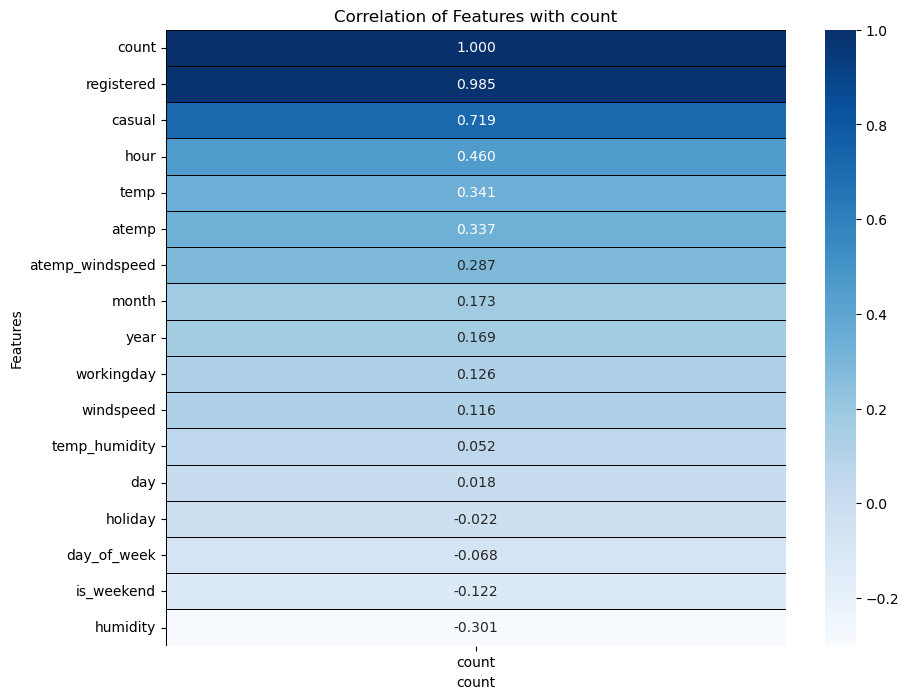

In [39]:
corr_with_count = bikeSharing_dataset[numeric_columns].corr()[['count']].sort_values(by='count', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_count, annot=True, cmap='Blues', linewidths=0.5, linecolor='black', fmt='.3f')
plt.title('Correlation of Features with count')
plt.xlabel('count')
plt.ylabel('Features')

### we notice we add strong feature highly corelated with count 'target' var

#### 3.2. Explain Feature Importance:

- Hour, Day, Month, Year, Day of Week: Temporal patterns often influence bike rentals.ex:bike usage might spike during certain hours, By including these features, the model can capture trends and seasonal variations, improving its ability to predict rental counts based on time.
- Is Weekend: Bike rental behavior likely differs between weekends and weekdays. 
this feature helps the model distinguish between different usage patterns, leading to more accurate predictions for weekends and weekdays.
- Temp_Humidity: High temperature combined with high humidity could significantly deter bike usage. 
- Atemp_Windspeed: Apparent temperature (how hot it feels) combined with wind speed can influence the comfort level of riders. 

## 4. Build and Evaluate a Linear Regression Model

#### 4.1. Train-Test Split:


In [44]:
# Define features and target
X = bikeSharing_dataset.drop(columns=['datetime', 'count','registered'])  # to avoid more related column to avoid overfitting
y = bikeSharing_dataset['count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train

,holiday,workingday,temp,atemp,humidity,windspeed,casual,season_2,season_3,season_4,...,weather_3,weather_4,hour,day,month,year,day_of_week,is_weekend,temp_humidity,atemp_windspeed
10316,0,1,12.30,14.395,65,16.9979,1,False,False,True,...,False,False,6,15,11,2012,3,0,799.50,244.684771
7432,0,1,24.60,28.790,78,16.9979,3,True,False,False,...,False,False,1,9,5,2012,2,0,1918.80,489.369541
7932,0,0,29.52,34.090,62,11.0014,83,True,False,False,...,False,False,21,10,6,2012,6,1,1830.24,375.037726
6056,0,1,12.30,15.150,56,11.0014,8,False,False,False,...,False,False,14,8,2,2012,2,0,688.80,166.671210
384,1,0,7.38,9.850,47,8.9981,10,False,False,False,...,False,False,12,17,1,2011,0,0,346.86,88.631285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,0,0,13.94,15.150,39,23.9994,9,False,False,False,...,False,False,0,19,2,2012,6,1,543.66,363.590910
5709,0,1,15.58,19.695,76,19.9995,0,False,False,False,...,False,False,1,13,1,2012,4,0,1184.08,393.890153
5933,0,1,11.48,12.880,56,19.0012,15,False,False,False,...,False,False,10,3,2,2012,4,0,642.88,244.735456
906,0,1,9.02,10.605,69,15.0013,0,False,False,False,...,False,False,5,2,3,2011,2,0,622.38,159.088787


In [46]:
X_test

,holiday,workingday,temp,atemp,humidity,windspeed,casual,season_2,season_3,season_4,...,weather_3,weather_4,hour,day,month,year,day_of_week,is_weekend,temp_humidity,atemp_windspeed
2459,0,1,31.16,34.850,55,0.0000,37,True,False,False,...,False,False,9,10,6,2011,4,0,1713.80,0.000000
10065,0,0,14.76,17.425,43,15.0013,31,False,False,True,...,False,False,18,4,11,2012,6,1,634.68,261.397652
9681,0,0,16.40,20.455,82,12.9980,24,False,False,True,...,True,False,18,7,10,2012,6,1,1344.80,265.874090
2445,0,1,34.44,37.120,39,22.0028,55,True,False,False,...,False,False,19,9,6,2011,3,0,1343.16,816.743936
6702,0,1,18.86,22.725,77,6.0032,52,False,False,False,...,False,False,13,16,3,2012,4,0,1452.22,136.422720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,0,1,18.86,22.725,36,0.0000,76,False,False,True,...,False,False,11,11,10,2012,3,0,678.96,0.000000
469,0,1,15.58,19.695,76,22.0028,10,False,False,False,...,False,False,15,2,2,2011,2,0,1184.08,433.345146
1898,0,1,18.04,21.970,44,11.0014,13,True,False,False,...,False,False,0,6,5,2011,4,0,793.76,241.700758
3325,0,1,33.62,37.120,48,23.9994,90,False,True,False,...,False,False,11,8,8,2011,0,0,1613.76,890.857728


#### 4.2. Train the Model:
○ Train a Linear Regression model on the training data.


In [48]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 4.3. Evaluate the Model:
○ Use metrics like MAE, RMSE, and R2 Score to assess performance.
○ Plot and interpret residuals to evaluate how well the model fits the data.

In [50]:
# Predict on the test set to eval
y_pred = model.predict(X_test)

In [51]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
2459,213,167.263207
10065,237,197.815358
9681,106,151.891149
2445,326,265.551340
6702,260,263.542950


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}') 

MAE: 53.87682971400641
RMSE: 73.29714198434152
R2 Score: 0.6436544388516847


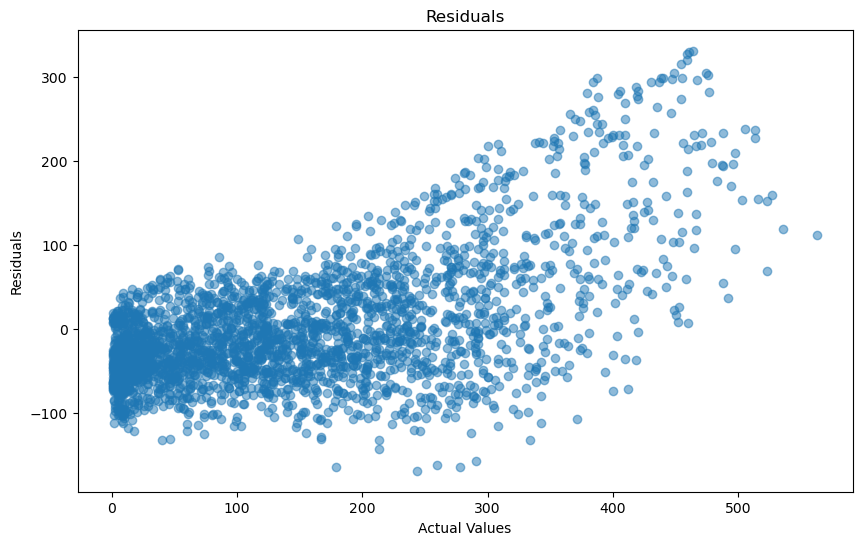

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, alpha=0.5)
plt.title('Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

### 5. Short Report
#### ● Key findings from the Exploratory Data Analysis (EDA)
The EDA show some insights into the bike-sharing dataset. The distribution of bike count is highly right-skewed, with most rental counts concentrated below 100, while the maximum count reached 563. The descriptive statistics also confirm this, with a mean rental count of 144.7 and a median of 119
Scatter plots between rental counts and other features highlight strong correlations. for example  temperature (temp), apparent temperature (atemp), and the number of registered users show positive relationships with rental counts. On the other hand, features like humidity and wind speed exhibit weaker or non-linear correlations. 

#### ● How feature engineering impacted the model
Feature engineering played a role in enhancing the model's performance. The addition of temporal features (hour, day, month, year, day_of_week, and is_weekend) enabled the model to capture seasonal and daily trends in bike rentals. Interaction terms such as temp_humidity and atemp_windspeed were included to reflect combined effects of weather variables, which are critical in modeling These features helped improve the predictive power by addressing nuanced relationships in the dataset And heatmap of correlations highlighted the importance of features added like tatemp_windspeed, which showed the highest positive correlations with rental counts

#### ● Model performance and challenges encountered during the process.
The linear regression model achieved a mean absolute error (MAE) of 53.88, a root mean squared error (RMSE) of 73.30, and an R² score of 0.644. While the R² score indicates that the model explains about 64.4% of the variance in bike rental counts, there is room for improvement, especially for handling non-linear relationships and reducing prediction errors. 

Several challenges were identified during modeling:

1. Overfitting - count and registered feture:
The high correlation between count (target variable) and registered introduces a risk of overfitting. Including registered as a feature gives the model an unfair advantage, as it directly correlates with the target. This can lead to overly optimistic performance metrics that do not generalize well to unseen data.

2. Handling Non-linear Relationships:
The linear regression model struggled to capture non-linear relationships between features like temp, humidity, and count. These complex interactions may require more sophisticated models, such as decision trees or ensemble methods.

## Bonus Task (Optional):
● Visualize the actual vs. predicted values for the test dataset.


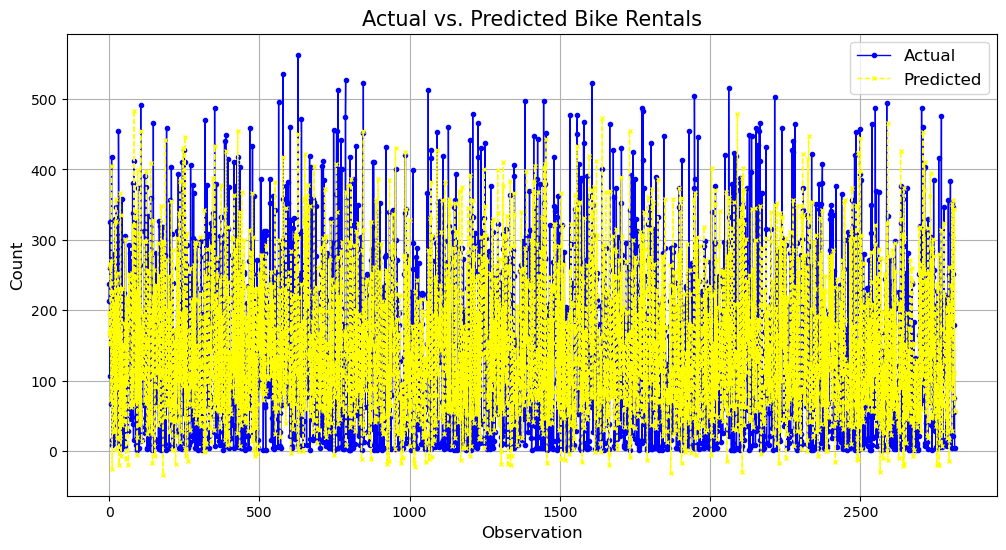

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.plot(y_pred, label='Predicted', color='yellow', marker='x', linestyle='--', linewidth=1, markersize=3)
plt.title('Actual vs. Predicted Bike Rentals', fontsize=15)
plt.xlabel('Observation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

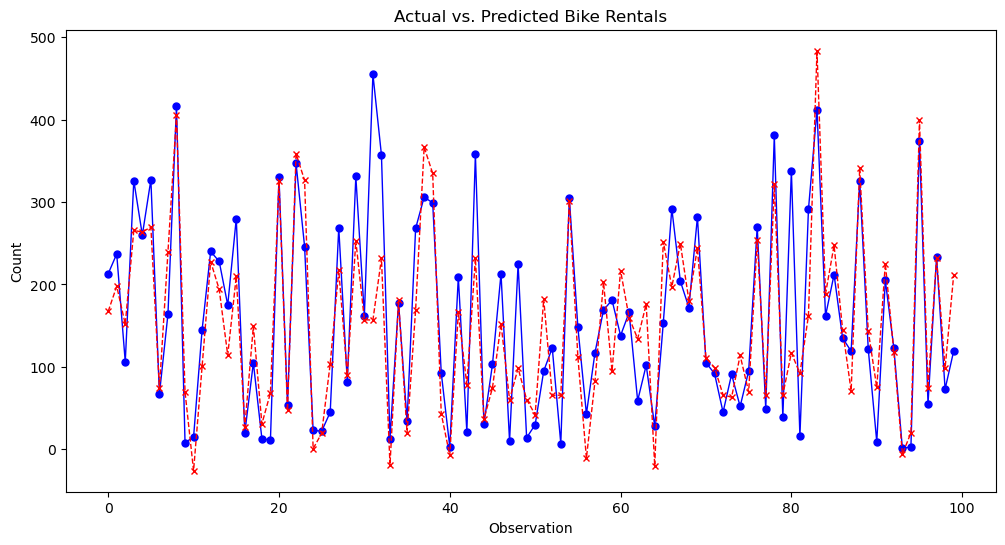

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', color='blue', marker='o', linewidth=1, markersize=5)
plt.plot(y_pred[:100], label='Predicted', color='red', marker='x', linestyle='--', linewidth=1, markersize=5)
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Observation')
plt.ylabel('Count')
plt.show()

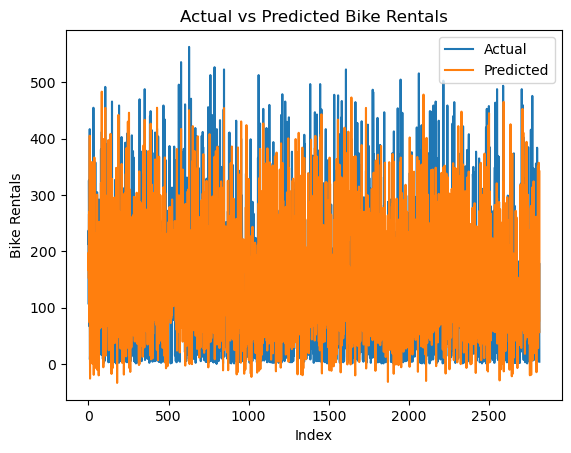

In [58]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.legend()